# Regression Algorithms

In this tutorial we will look at other regression algorithms to build a regression model to predict loan amounts. We will look at:

* K Nearest Neighbors
* Decision Trees
* Random Forests
* Support Vector Machines

## K Nearest Neighbors

K Nearest Neigbors (KNN) is an non-parametric lazy learning algorithm. That is a pretty concise statement. When you say a technique is non parametric, it means that it does not make any assumptions on the underlying data distribution. This is pretty useful, as in the real world, most of the practical data does not obey the typical theoretical assumptions made (eg gaussian mixtures, linearly separable etc). Non parametric algorithms like KNN come to the rescue here.

When a prediction is required for a unseen data instance, the KNN algorithm will search through the training dataset for the k-most similar instances. The prediction attribute of the most similar instances is summarized and returned as the prediction for the unseen instance.

Below is an example:

<img src="https://cdn-images-1.medium.com/max/1000/0*zbaCKocplWAbM1m5.">

The similarity measure is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.

In the case of regression problems, the average of the predicted attribute may be returned. In the case of classification, the most prevalent class may be returned.

Lazy learning refers to the fact that the algorithm does not build a model until the time that a prediction is required. It is lazy because it only does work at the last second. This has the benefit of only including data relevant to the unseen data, called a localized model. A disadvantage is that it can be computationally expensive to repeat the same or similar searches over larger training datasets.

## Building a KNN Regression Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Personal_Loans.csv')
df.head()

Age  Experience  Income  Family  CCAvg     Education  Mortgage  \
0   26           2      60       2    3.0     Undergrad       132   
1   26           0      83       3    3.9      Postgrad         0   
2   26           0     129       3    0.7      Postgrad         0   
3   26           0     132       3    6.5  Professional         0   
4   26           2     132       2    2.4  Professional         0   

   Securities Account  CD Account  Online  Gender         Area  Personal Loan  \
0                   0           0       0    Male      Alameda              1   
1                   0           0       1  Female      Ventura              1   
2                   0           0       0    Male  Los Angeles              1   
3                   0           0       0  Female       Orange              1   
4                   0           0       0    Male      Alameda              1   

   Loan Size  
0         15  
1         30  
2         33  
3         40  
4         35

We only want to consider customers who took ouot a loan:

In [4]:
df = df[df['Personal Loan'] == 1]
df.head()

Age  Experience  Income  Family  CCAvg     Education  Mortgage  \
0   26           2      60       2    3.0     Undergrad       132   
1   26           0      83       3    3.9      Postgrad         0   
2   26           0     129       3    0.7      Postgrad         0   
3   26           0     132       3    6.5  Professional         0   
4   26           2     132       2    2.4  Professional         0   

   Securities Account  CD Account  Online  Gender         Area  Personal Loan  \
0                   0           0       0    Male      Alameda              1   
1                   0           0       1  Female      Ventura              1   
2                   0           0       0    Male  Los Angeles              1   
3                   0           0       0  Female       Orange              1   
4                   0           0       0    Male      Alameda              1   

   Loan Size  
0         15  
1         30  
2         33  
3         40  
4         35

### Pre-Processing

In [5]:
# Lables
y = df['Loan Size']

# Features
X = df.drop(['Personal Loan', 'Loan Size'], axis=1)

In [6]:
# Transform data
X_transformed = pd.get_dummies(X, drop_first=True)

In [8]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=50)

### Training

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knn = KNeighborsRegressor()

In [13]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### Predicting

In [14]:
pred_knn = knn.predict(X_test)

### Testing

In [15]:
from sklearn.metrics import mean_squared_error

Actual vs Expected

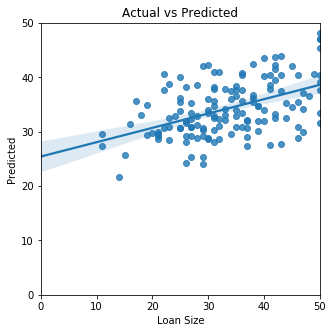

In [16]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

sns.regplot(x=y_test, y=pred_knn)

RMSE

In [17]:
print('RMSE:', mean_squared_error(y_test, pred_knn) ** 0.5)

RMSE: 8.209733144862819


### Tuning Parameters to Improve Model

For the KNN algorithm we can tune parameters to improve the model. The most important parameter is k - the number of closest data points we train our model on to use to predict a new data point. 

Let's use different values of k and compare the results:

#### Train

In [18]:
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_20 = KNeighborsRegressor(n_neighbors=20)

In [19]:
knn_3.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [20]:
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
knn_20.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

#### Predict

In [22]:
pred_knn_3 = knn_3.predict(X_test)
pred_knn_5 = knn_5.predict(X_test)
pred_knn_20 = knn_20.predict(X_test)

#### Test

Actual vs Expected

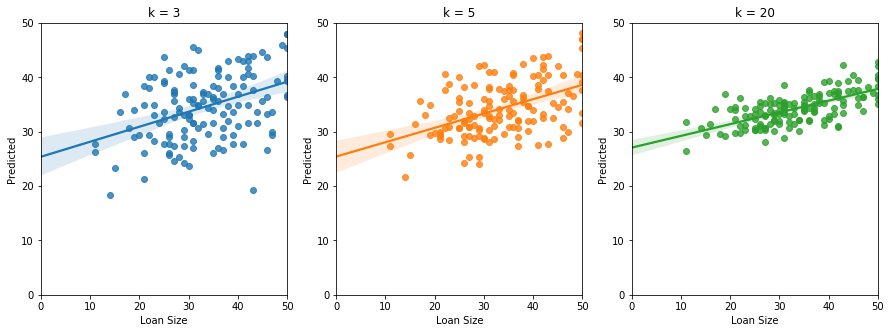

In [23]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_knn_3, pred_knn_5, pred_knn_20]
title = ['k = 3', 'k = 5', 'k = 20']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 50)
    ax[i].set_ylim(0, 50)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i]) 

RMSE

In [24]:
print('RMSE:')
print('k=3:', mean_squared_error(y_test, pred_knn_3) ** 0.5)
print('k=5:', mean_squared_error(y_test, pred_knn_5) ** 0.5)
print('k=20:', mean_squared_error(y_test, pred_knn_20) ** 0.5)

RMSE:
k=3: 8.833576929939072
k=5: 8.209733144862819
k=20: 7.668989365446007


Looking at the RMSE's, the best fitting model is when k=20. Can you find the optimal k?

## Decision Trees

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are extremely intuitive ways to classify objects or predict continuous values: you simply ask a series of questions designed to zero-in on the classification/prediction. For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:

<img src="https://cocalc.com/share/e9d2f604-5c15-48c1-8c69-4d560cf9a933/PythonDataScienceHandbook/notebooks/figures/05.08-decision-tree.png">

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes. The trick, of course, comes in deciding which questions to ask at each step. In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.

The predictions of the tree are the mean values of the labels in that specific group of observations (training data). For classification it's the mode value of the labels. Let's now look at using decision trees on the Personal Loans Data.

## Building a Decision Tree Regression Model

### Training

This process of fitting a decision tree to our data can be done in Scikit-Learn with the DecisionTreeRegressor estimator:

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree = DecisionTreeRegressor(random_state=50)

In [43]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

### Predicting

In [44]:
pred_tree = tree.predict(X_test)

### Testing

In [45]:
from sklearn.metrics import mean_squared_error

Actual vs Expected

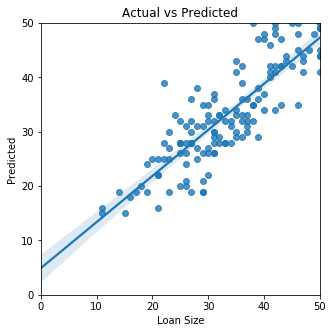

In [46]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

sns.regplot(x=y_test, y=pred_tree)

RMSE

In [47]:
print('RMSE:', mean_squared_error(y_test, pred_tree) ** 0.5)

RMSE: 5.004927149784289


### Tuning parameters to Improve Model

For the Decision Tree algorithm we can tune parameters to improve the model. The most commonly tuned parameters are:

* max_depth - maximum depth of the tree
* min_samples_leaf - minimum number of samples required to be at a leaf node

Let's make some changes to these parameters and compare the results:

#### Train

In [48]:
# max_depth=2 and min_samples_leaf=5
tree_1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=50)

# max_depth=5 and min_samples_leaf=4
tree_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=50)

# max_depth=10 and min_samples_leaf=3
tree_3 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, random_state=50)

In [49]:
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

In [50]:
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

In [51]:
tree_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

#### Predict

In [52]:
pred_tree_1 = tree_1.predict(X_test)
pred_tree_2 = tree_2.predict(X_test)
pred_tree_3 = tree_3.predict(X_test)

#### Test

Actual vs Expected

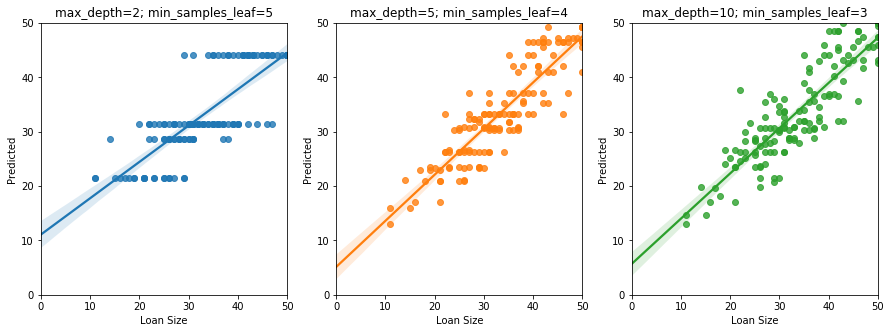

In [53]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_tree_1, pred_tree_2, pred_tree_3]
title = ['max_depth=2; min_samples_leaf=5', 'max_depth=5; min_samples_leaf=4', 'max_depth=10; min_samples_leaf=3']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 50)
    ax[i].set_ylim(0, 50)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [54]:
print('RMSE:')
print('max_depth=2; min_samples_leaf=5:', mean_squared_error(y_test, pred_tree_1) ** 0.5)
print('max_depth=5; min_samples_leaf=4:', mean_squared_error(y_test, pred_tree_2) ** 0.5)
print('max_depth=10; min_samples_leaf=3:', mean_squared_error(y_test, pred_tree_3) ** 0.5)

RMSE:
max_depth=2; min_samples_leaf=5: 5.626437372824107
max_depth=5; min_samples_leaf=4: 4.266603647407825
max_depth=10; min_samples_leaf=3: 4.662583962744049


Looking at the RMSE's, the tree with max_depth of 5 and min_samples_leaf of 4 performed the best. Can you find the optimal parameters?

## Random Forests

Over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. This issue can be addressed by using **Random Forests**.

A random forest is a powerful non-parametric algorithm that is an example of an **ensemble** method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensemble of trees are randomized and the output is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

Below is an example of how it can be pictured:

<img src="https://www.researchgate.net/profile/Evaldas_Vaiciukynas/publication/301638643/figure/fig1/AS:355471899807744@1461762513154/Architecture-of-the-random-forest-model.png">

The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting!

## Building a Random Forest Regression Model

### Training

This process of fitting a decision tree to our data can be done in Scikit-Learn with the DecisionTreeRegressor estimator:

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Our forest consists of 100 trees in this example
forest = RandomForestRegressor(n_estimators=100, random_state=50)

In [57]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

### Predicting

In [58]:
pred_forest = forest.predict(X_test)

### Testing

Actual vs Expected

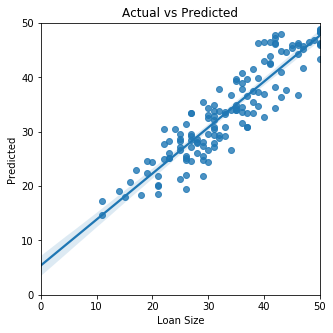

In [59]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

sns.regplot(x=y_test, y=pred_forest)

RMSE

In [60]:
print('RMSE:', mean_squared_error(y_test, pred_forest) ** 0.5)

RMSE: 3.8221323596453183


### Tuning parameters to Improve Model

For the Random Forest algorithm we can tune parameters to improve the model. The most commonly tuned parameters are:

* n_estimators - number of trees to include in forest
* max_depth - maximum depth of the tree
* min_samples_leaf - minimum number of samples required to be at a leaf node

Let's make some changes to the n_estimators parameter and compare the results:

#### Train

In [61]:
# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=50)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=50)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=50)

In [62]:
forest_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [63]:
forest_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [64]:
forest_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

#### Predict

In [65]:
pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

#### Test

Actual vs Expected

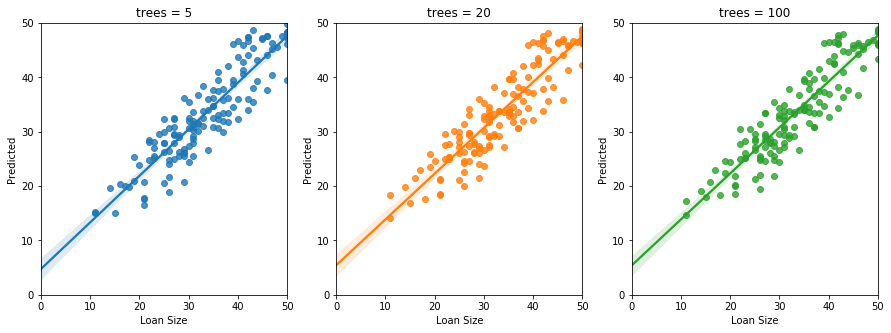

In [66]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 50)
    ax[i].set_ylim(0, 50)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i]) 

RMSE

In [67]:
print('RMSE:')
print('trees=5:', mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', mean_squared_error(y_test, pred_forest_3) ** 0.5)

RMSE:
trees=5: 3.9723339008344087
trees=20: 3.9546616279460993
trees=100: 3.8221323596453183


Looking at the RMSE's, the forest with 100 trees performed the best. Can you find the optimal parameters (including max_depth and min_samples_leaf) ?

## Support Vector Machines

A SVM is a discriminative classifier formally defined by a separating hyperplane (i.e. a plane that linearly separates data points). In other words, given labeled training data, the algorithm outputs an optimal hyperplane which categorizes new examples.

<img src="https://docs.opencv.org/2.4/_images/optimal-hyperplane.png">

**How to find the optimal hyperplane?**

You might ask how do find the optimal hyperplane? This is simply the hyperplane that maximizes the **margin** (i.e. twice the distance between the hyperplane and the nearest data points). It will ensure a greater chance that a new point gets classified correctly.

The data points that are coloured-in in the above picture are known as **Support Vectors**. Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set.

**What if the data cannot be separated by a hyperplane?**

This is not a problem for SVM's as it allows for some points to be on the wrong side of the margin and/or hyperplane. However, most times in the real-world it is impossible to linearly separate data (i.e. too many points will be on the wrong side of hyperplane). 

Luckily the SVM can account for this as well with what is called the **Kernel Trick**. All this does is transform the data (feaures) into a higher dimension and then finds a hyperplane that separates the data in the higher dimension. For example 2D data can be transformed into 3D and the hyperplane will be a plane and no longer a line. See the below picture:

<img src="https://78.media.tumblr.com/9bffea56372d28d2a30f80557451e824/tumblr_inline_o9aabehtqP1u37g00_540.png">

SVM's can also be extended to regression problems - it finds the optimal regression plane that minimizes the error. In this tutorial we will only consider the regression side of SVM's.

## Building a SVM Classification Model

### Training

This process of fitting a decision tree to our data can be done in Scikit-Learn with the SVR estimator:

In [68]:
from sklearn.svm import SVR

In [69]:
svm = SVR(kernel='linear', C=500, gamma=50)

In [70]:
svm.fit(X_train, y_train)

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=50,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting

In [71]:
pred_svm = svm.predict(X_test)

### Testing

Actual vs Expected

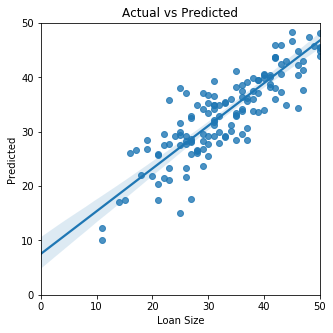

In [72]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)

sns.regplot(x=y_test, y=pred_svm)

RMSE

In [73]:
print('RMSE:', mean_squared_error(y_test, pred_svm) ** 0.5)

RMSE: 4.675706607397117


### Tuning parameters to Improve Model

For the SVM algorithm we can tune parameters to improve the model. The most commonly tuned parameters are:

* **kernel** - specifies the kernel type to be used in the algorithm (i.e. transformation of feature space)
* **C** - controls the allowance for misclassification on either side of margin/hyperplane (higher C implies fewer misclassifications allowed)
* **gamma** - defines how far the influence of a single training example reaches (high gamma implies we are only concerned with points close to hyperplane)

Both C and gamma are regularisation parameters used to control bias/variance trade-off.

Let's make some changes to these parameters and compare the results:

#### Train

In [74]:
# kernel=linear, C=100, gamma=20
svm_1 = SVR(kernel='linear', C=100, gamma=20)

# kernel=rbf, C=10, gamma=0.01
svm_2 = SVR(kernel='rbf', C=10, gamma=0.01)

# kernel=poly, C=20, gamma=1
svm_3 = SVR(kernel='poly', C=20, gamma=1)

In [75]:
svm_1.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=20,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
svm_2.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
svm_3.fit(X_train, y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predict

In [78]:
pred_svm_1 = svm_1.predict(X_test)
pred_svm_2 = svm_2.predict(X_test)
pred_svm_3 = svm_3.predict(X_test)

#### Test

Actual vs Expected

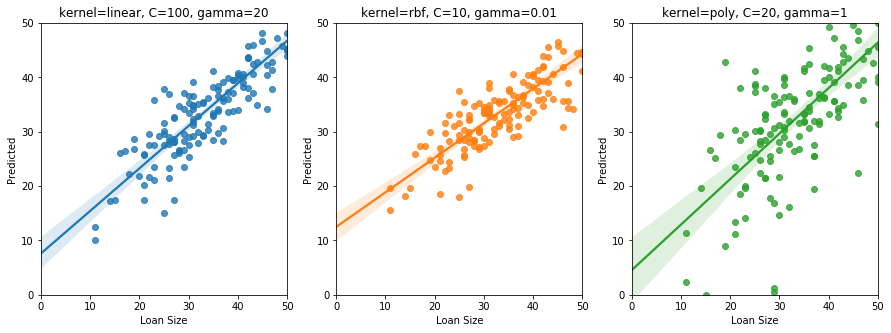

In [79]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_svm_1, pred_svm_2, pred_svm_3]
title = ['kernel=linear, C=100, gamma=20', 'kernel=rbf, C=10, gamma=0.01', 'kernel=poly, C=20, gamma=1']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 50)
    ax[i].set_ylim(0, 50)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])

RMSE

In [80]:
print('RMSE:')
print('kernel=linear, C=100, gamma=20:', mean_squared_error(y_test, pred_svm_1) ** 0.5)
print('kernel=rbf, C=10, gamma=0.01:', mean_squared_error(y_test, pred_svm_2) ** 0.5)
print('kernel=poly, C=20, gamma=1:', mean_squared_error(y_test, pred_svm_3) ** 0.5)

RMSE:
kernel=linear, C=100, gamma=20: 4.6731625868491795
kernel=rbf, C=10, gamma=0.01: 5.201454623079206
kernel=poly, C=20, gamma=1: 8.628473042248137


Looking at the above results, the svm with a linear kernel and regularisation parameters of C=100 and gamma=20 performed the best in terms of RMSE, but that was due to predicting all results very close to the mean. Can you find the optimal parameters?

That's the end of this tutorial. We covered various regression algorithms and how to tune their parameters. In the next tutorial we will take a more in-depth look at buidling a regression model.